In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [2]:
!pip install requests pandas matplotlib seaborn

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import random
import matplotlib.font_manager as fm

In [3]:
# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


 예제 : JSONPlaceholder API - 소셜 미디어 데이터 분석
 1단계: 사용자 데이터 가져오기
 10명의 사용자 데이터 수집 완료

 2단계: 게시물 데이터 가져오기
 100개의 게시물 데이터 수집 완료

 3단계: 댓글 데이터 가져오기
 500개의 댓글 데이터 수집 완료

 4단계: 데이터 분석 및 시각화


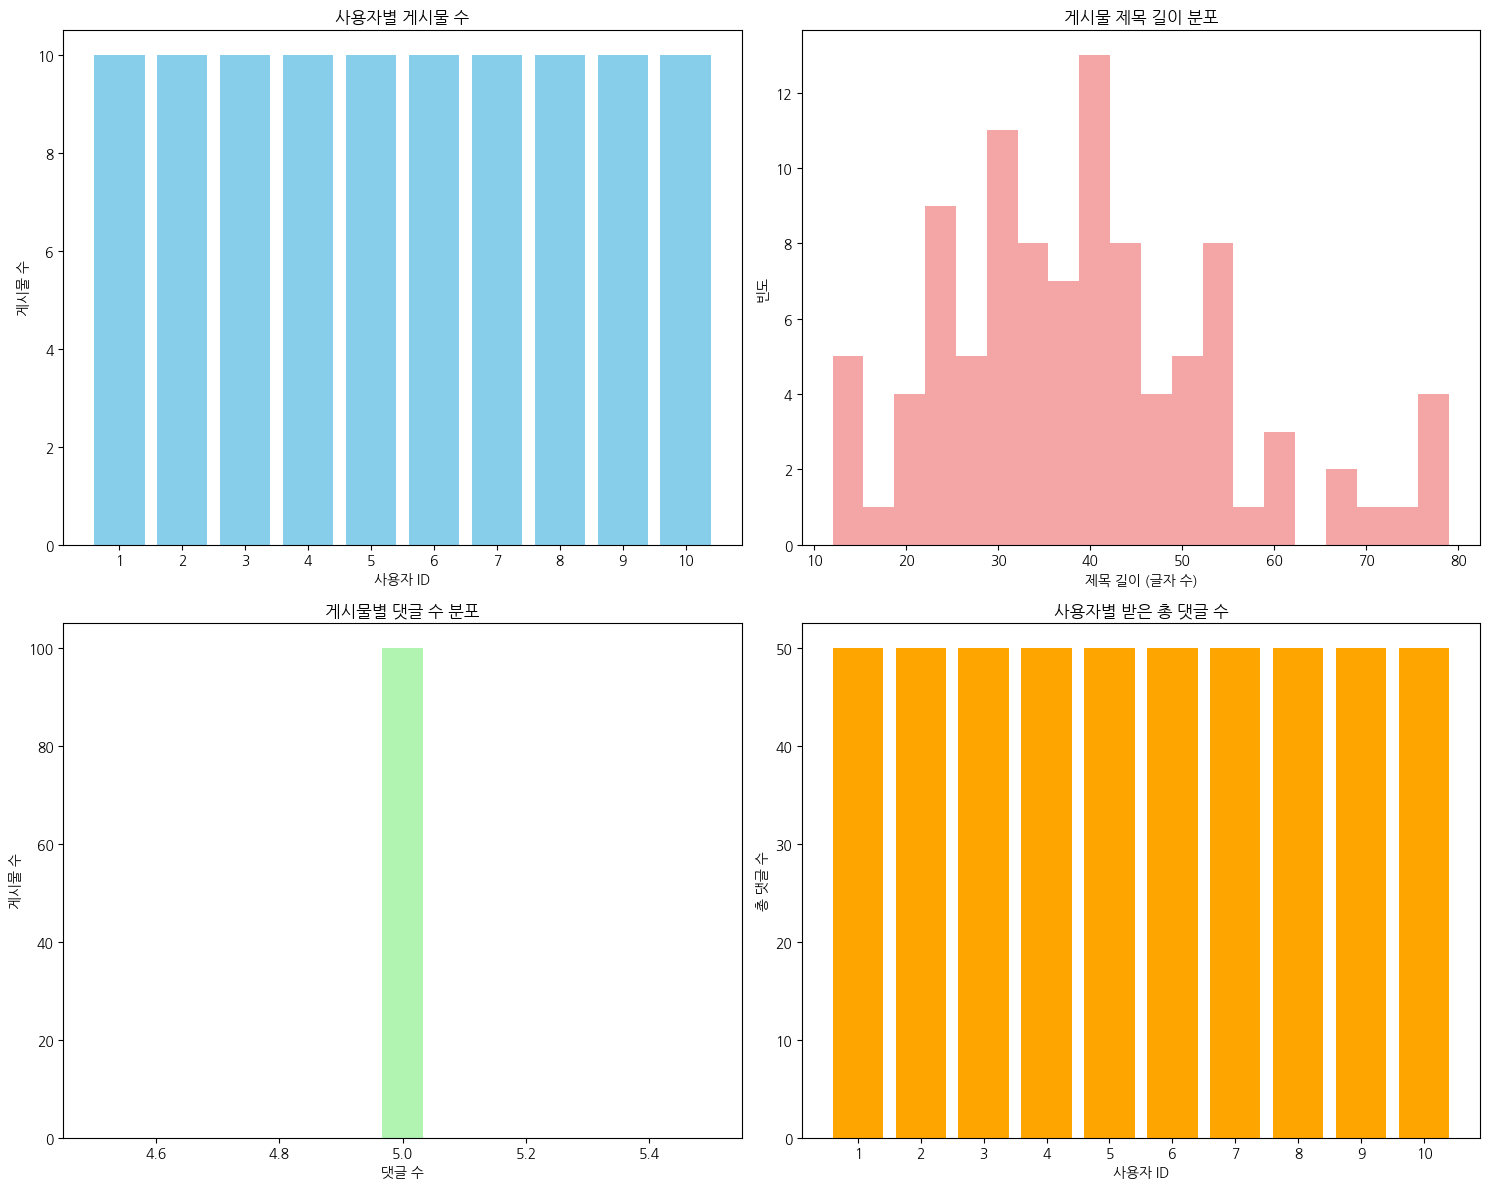


 소셜 미디어 분석 결과:
 전체 게시물 수: 100개
 전체 댓글 수: 500개
 평균 게시물 길이: 39.5글자
 평균 댓글 수: 5.0개

 TOP 3 활발한 사용자:
1. Leanne Graham (게시물: 10개, 받은 댓글: 50개)
2. Ervin Howell (게시물: 10개, 받은 댓글: 50개)
3. Clementine Bauch (게시물: 10개, 받은 댓글: 50개)


In [4]:
print("\n 예제 : JSONPlaceholder API - 소셜 미디어 데이터 분석")
print("=" * 60)

def example_1_social_media_analysis():
    """
    가상의 SNS 데이터를 분석하는 예제
    - 사용자, 게시물, 댓글 데이터 연동
    - 여러 API 엔드포인트 활용
    - 데이터 관계 분석
    """

    print(" 1단계: 사용자 데이터 가져오기")

    # 사용자 정보 가져오기
    users_response = requests.get("https://jsonplaceholder.typicode.com/users")
    users_data = users_response.json()
    users_df = pd.DataFrame(users_data)

    print(f" {len(users_data)}명의 사용자 데이터 수집 완료")

    print("\n 2단계: 게시물 데이터 가져오기")

    # 게시물 정보 가져오기
    posts_response = requests.get("https://jsonplaceholder.typicode.com/posts")
    posts_data = posts_response.json()
    posts_df = pd.DataFrame(posts_data)

    print(f" {len(posts_data)}개의 게시물 데이터 수집 완료")

    print("\n 3단계: 댓글 데이터 가져오기")

    # 댓글 정보 가져오기
    comments_response = requests.get("https://jsonplaceholder.typicode.com/comments")
    comments_data = comments_response.json()
    comments_df = pd.DataFrame(comments_data)

    print(f" {len(comments_data)}개의 댓글 데이터 수집 완료")

    print("\n 4단계: 데이터 분석 및 시각화")

    # 사용자별 게시물 수 계산
    posts_per_user = posts_df.groupby('userId').size().reset_index(name='post_count')
    posts_per_user = posts_per_user.merge(users_df[['id', 'name']], left_on='userId', right_on='id')

    # 게시물별 댓글 수 계산
    comments_per_post = comments_df.groupby('postId').size().reset_index(name='comment_count')
    posts_with_comments = posts_df.merge(comments_per_post, left_on='id', right_on='postId', how='left')
    posts_with_comments['comment_count'] = posts_with_comments['comment_count'].fillna(0)

    # 시각화
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. 사용자별 게시물 수
    axes[0, 0].bar(range(len(posts_per_user)), posts_per_user['post_count'], color='skyblue')
    axes[0, 0].set_title('사용자별 게시물 수')
    axes[0, 0].set_xlabel('사용자 ID')
    axes[0, 0].set_ylabel('게시물 수')
    axes[0, 0].set_xticks(range(len(posts_per_user)))
    axes[0, 0].set_xticklabels(posts_per_user['userId'])

    # 2. 게시물 제목 길이 분포
    posts_df['title_length'] = posts_df['title'].str.len()
    axes[0, 1].hist(posts_df['title_length'], bins=20, color='lightcoral', alpha=0.7)
    axes[0, 1].set_title('게시물 제목 길이 분포')
    axes[0, 1].set_xlabel('제목 길이 (글자 수)')
    axes[0, 1].set_ylabel('빈도')

    # 3. 댓글 수 분포
    axes[1, 0].hist(posts_with_comments['comment_count'], bins=15, color='lightgreen', alpha=0.7)
    axes[1, 0].set_title('게시물별 댓글 수 분포')
    axes[1, 0].set_xlabel('댓글 수')
    axes[1, 0].set_ylabel('게시물 수')

    # 4. 사용자별 총 댓글 수 (자신의 게시물에 달린 댓글)
    user_comments = posts_df.merge(comments_per_post, left_on='id', right_on='postId', how='left')
    user_comments['comment_count'] = user_comments['comment_count'].fillna(0)
    total_comments_per_user = user_comments.groupby('userId')['comment_count'].sum().reset_index()

    axes[1, 1].bar(range(len(total_comments_per_user)), total_comments_per_user['comment_count'], color='orange')
    axes[1, 1].set_title('사용자별 받은 총 댓글 수')
    axes[1, 1].set_xlabel('사용자 ID')
    axes[1, 1].set_ylabel('총 댓글 수')
    axes[1, 1].set_xticks(range(len(total_comments_per_user)))
    axes[1, 1].set_xticklabels(total_comments_per_user['userId'])

    plt.tight_layout()
    plt.show()

    # 인기 사용자 분석
    popular_users = posts_per_user.merge(total_comments_per_user, on='userId', how='left')
    popular_users['comment_count'] = popular_users['comment_count'].fillna(0)
    popular_users['engagement_score'] = popular_users['post_count'] * 2 + popular_users['comment_count']
    popular_users = popular_users.sort_values('engagement_score', ascending=False)

    print("\n 소셜 미디어 분석 결과:")
    print(f" 전체 게시물 수: {len(posts_data)}개")
    print(f" 전체 댓글 수: {len(comments_data)}개")
    print(f" 평균 게시물 길이: {posts_df['title_length'].mean():.1f}글자")
    print(f" 평균 댓글 수: {posts_with_comments['comment_count'].mean():.1f}개")

    print(f"\n TOP 3 활발한 사용자:")
    for i, row in popular_users.head(3).iterrows():
        print(f"{i+1}. {row['name']} (게시물: {row['post_count']}개, 받은 댓글: {int(row['comment_count'])}개)")

    return users_df, posts_df, comments_df

# 예제 실행
users_df, posts_df, comments_df = example_1_social_media_analysis()